In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import pandas_profiling as pp
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [162]:
data = pd.read_csv("C:/Users/user/OneDrive/桌面/Air/data/Taoyuan.csv")
data["date"] = pd.to_datetime(data['DataCreationDate']).dt.date
data.head()

,SiteName,County,AQI,SO2,CO,O3,PM10,PM2.5,NO2,NOx,NO,WindSpeed,WindDirec,DataCreationDate,Temp,Humidity,date
0,桃園,桃園市,23.0,9.6,0.43,17.2,13.0,7.0,16.5,18.1,1.7,NaN,347.0,2021/6/1 00:00,23.0,98.0,2021-06-01
1,桃園,桃園市,23.0,5.3,0.39,16.6,16.0,8.0,14.7,16.2,1.5,0.7,194.0,2021/6/1 01:00,23.1,98.0,2021-06-01
2,桃園,桃園市,23.0,4.4,0.48,7.5,14.0,6.0,23.8,24.3,0.3,0.7,180.0,2021/6/1 02:00,23.0,99.0,2021-06-01
3,桃園,桃園市,25.0,4.5,0.44,6.0,18.0,13.0,23.0,24.0,1.0,0.5,224.0,2021/6/1 03:00,22.8,98.0,2021-06-01
4,桃園,桃園市,27.0,3.9,0.37,6.5,15.0,10.0,NaN,NaN,NaN,0.5,112.0,2021/6/1 04:00,23.0,98.0,2021-06-01


In [163]:
### 以 "天" 分組，畫時間序列圖
day = data.groupby('date').mean()
day.head()

,AQI,SO2,CO,O3,PM10,PM2.5,NO2,NOx,NO,WindSpeed,WindDirec,Temp,Humidity
date,,,,,,,,,,,,,
2021-06-01,45.458333,4.970833,0.423750,32.537500,21.391304,12.695652,16.934783,20.352174,3.408696,1.130435,168.250000,26.304167,86.708333
2021-06-02,36.875000,3.916667,0.350000,26.120833,22.625000,9.791667,15.870833,18.558333,2.675000,1.329167,204.500000,27.929167,80.375000
2021-06-03,40.375000,5.145833,0.283750,25.691667,24.869565,11.941176,12.670833,15.637500,2.975000,1.217391,231.750000,29.650000,73.000000
2021-06-04,20.833333,3.495833,0.263333,18.520833,19.291667,NaN,10.504167,13.508333,3.012500,1.425000,183.217391,27.445833,85.708333
2021-06-05,27.708333,3.191667,0.210833,35.525000,11.791667,NaN,9.895652,10.591304,0.700000,1.462500,155.166667,24.604167,94.458333


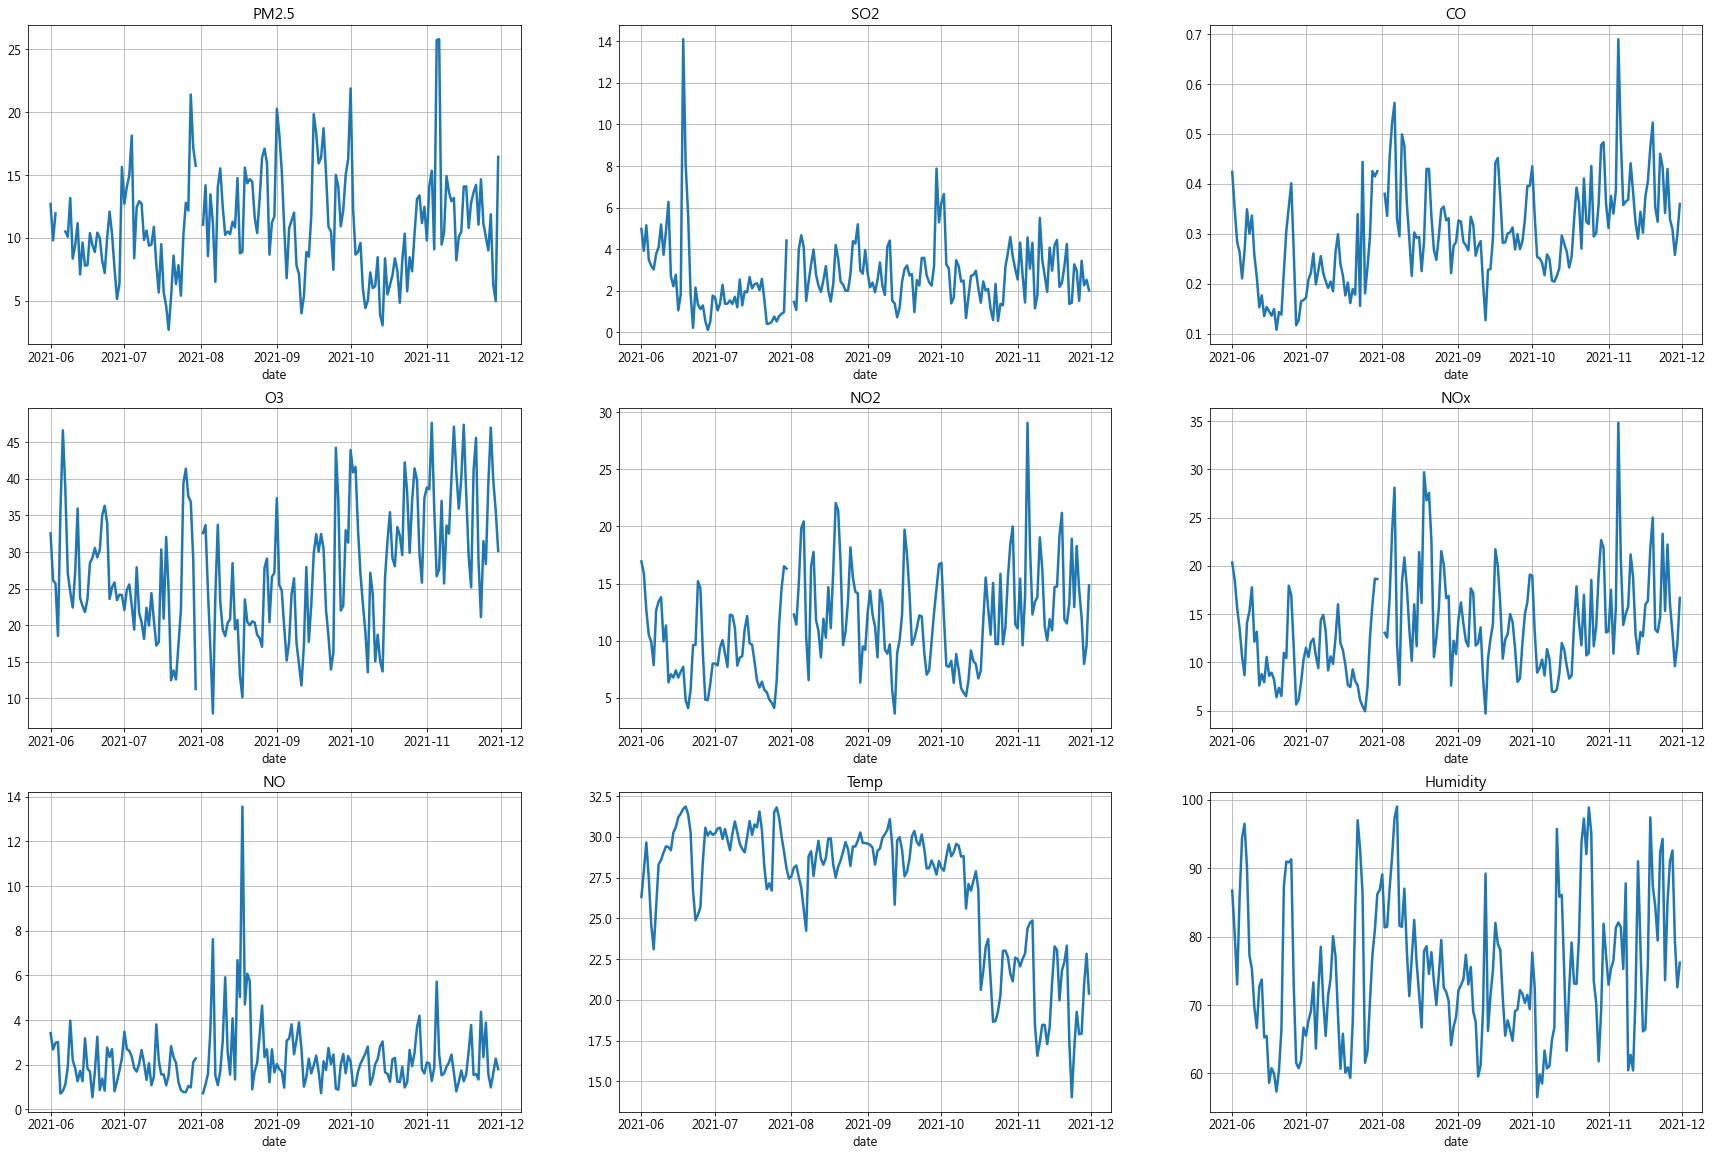

In [128]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字體
plt.rcParams['axes.unicode_minus'] = False                # 用來正常顯示負號
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams.update({'font.size': 12})
fig,axes=plt.subplots(3,3)
p1 = day['PM2.5'].plot(grid=True, linewidth=2.5, ax = axes[0,0])
p1.set_title("PM2.5")
p2 = day['SO2'].plot(grid=True, linewidth=2.5, ax = axes[0,1])
p2.set_title("SO2")
p3 = day['CO'].plot(grid=True, linewidth=2.5, ax = axes[0,2])
p3.set_title("CO")
p4 = day['O3'].plot(grid=True, linewidth=2.5, ax = axes[1,0])
p4.set_title("O3")
p5 = day['NO2'].plot(grid=True, linewidth=2.5, ax = axes[1,1])
p5.set_title("NO2")
p6 = day['NOx'].plot(grid=True, linewidth=2.5, ax = axes[1,2])
p6.set_title("NOx")
p7 = day['NO'].plot(grid=True, linewidth=2.5, ax = axes[2,0])
p7.set_title("NO")
p8 = day['Temp'].plot(grid=True, linewidth=2.5, ax = axes[2,1])
p8.set_title("Temp")
p9 = day['Humidity'].plot(grid=True, linewidth=2.5, ax = axes[2,2])
p9.set_title("Humidity");

## 讀入資料

In [2]:
data = pd.read_csv("C:/Users/user/OneDrive/桌面/Air/data/Taoyuan.csv")
data = data.loc[:, ["DataCreationDate", "PM2.5"]]
data.isnull().sum()

DataCreationDate      0
PM2.5               275
dtype: int64

### KNN 補值

In [3]:
imputer = KNNImputer(n_neighbors=1)
data[['PM2.5']] = imputer.fit_transform(data[['PM2.5']])
data.isnull().sum()

DataCreationDate    0
PM2.5               0
dtype: int64

### 時間轉換 datetime

In [4]:
# data["date"] = pd.to_datetime(data['DataCreationDate']).dt.date
data['DataCreationDate'] = pd.to_datetime(data['DataCreationDate'])
data_1 = data.set_index('DataCreationDate')
data_1.head()

,PM2.5
DataCreationDate,
2021-06-01 00:00:00,7.0
2021-06-01 01:00:00,8.0
2021-06-01 02:00:00,6.0
2021-06-01 03:00:00,13.0
2021-06-01 04:00:00,10.0


## 時間序列圖

<Figure size 720x1440 with 0 Axes>

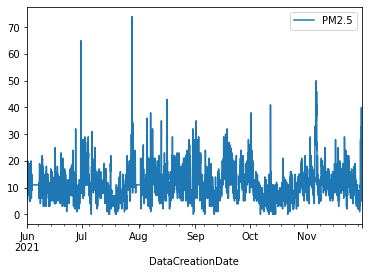

In [27]:
plt.figure(figsize=(10, 20))
data_1.plot();

## ACF、PACF 圖

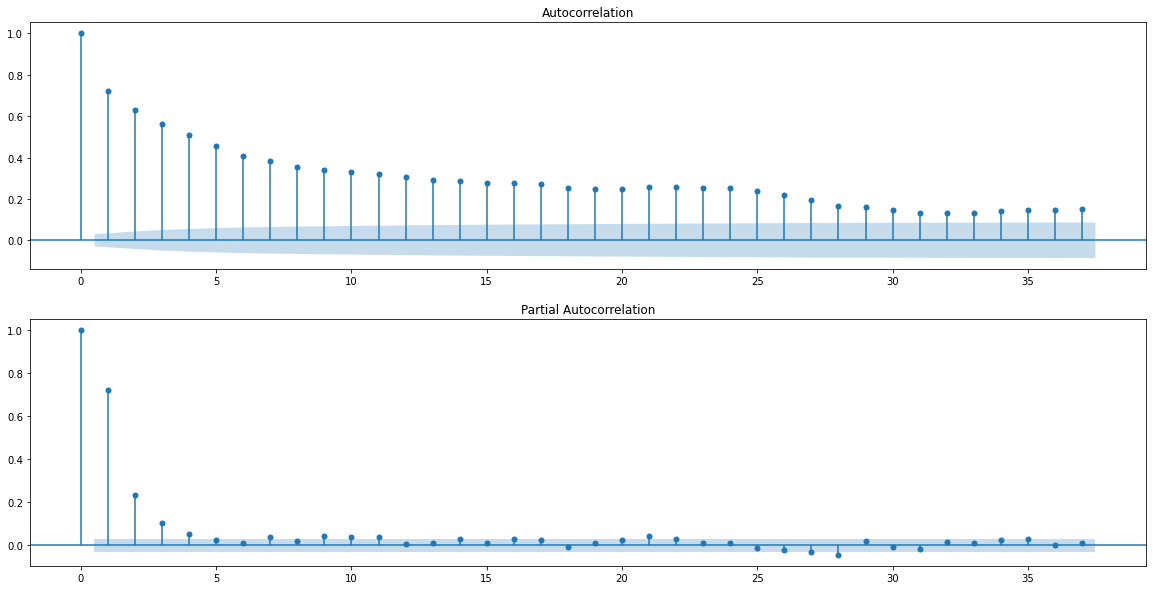

In [28]:
series = data_1[["PM2.5"]]
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

## Auto Arima

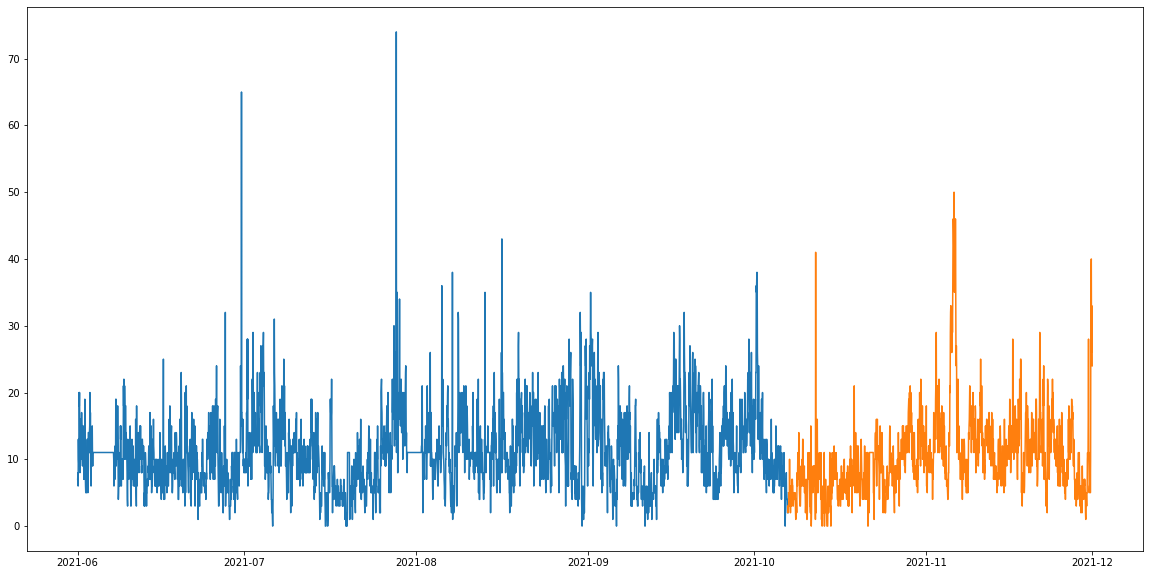

In [30]:
data_2 = data_1["PM2.5"]

# 分成訓練集和驗證集
train = data_2[:int(0.7*(len(data_2)))]
valid = data_2[int(0.7*(len(data_2))):]

plt.figure(figsize=(20,10))
plt.plot(train)
plt.plot(valid);

### 使用 seasonal_decompose 查看時間序列狀況
> 第一個小圖 observed 就是我們觀測到的實際值，第二個圖 Trend 可以看到它整體的變化趨勢，第三個 seasonal 是整個序列表現出來的季節性部分，第四個 residual 是殘差

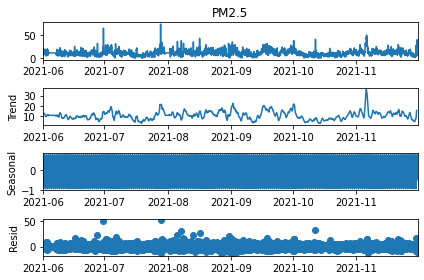

In [31]:
series = data_2
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [32]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_2, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',  
                            suppress_warnings=True, stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=28587.574, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=26662.242, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=28030.677, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=26175.994, Time=1.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=26765.518, Time=0.81 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=26015.584, Time=2.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=26497.826, Time=1.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=10.07 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.02 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=25951.238, Time=2.56 sec
 ARIMA(3,1,0)(1,1,0)[12]             : A

In [33]:
stepwise_model = auto_arima(data_2, start_p=1, start_q=1, max_p=3, max_q=3, start_P=0,
                            seasonal=False, d=2, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=29937.904, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=27856.443, Time=0.28 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=29935.904, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=26953.660, Time=0.32 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=26444.780, Time=0.54 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.39 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=26442.781, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=26951.660, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.89 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.84 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 26.984 seconds
26442.780975319234


## ARIMA
### Moving Average

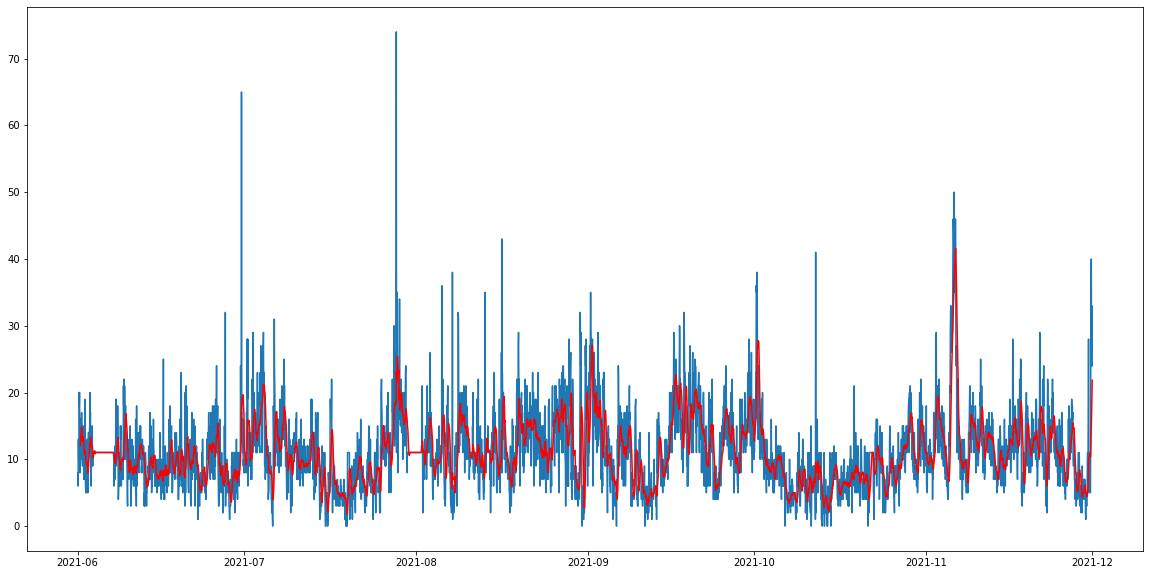

In [34]:
moving_avg = data_2.rolling(12).mean()

plt.figure(figsize=(20,10))
plt.plot(data_2)
plt.plot(moving_avg, color='red')

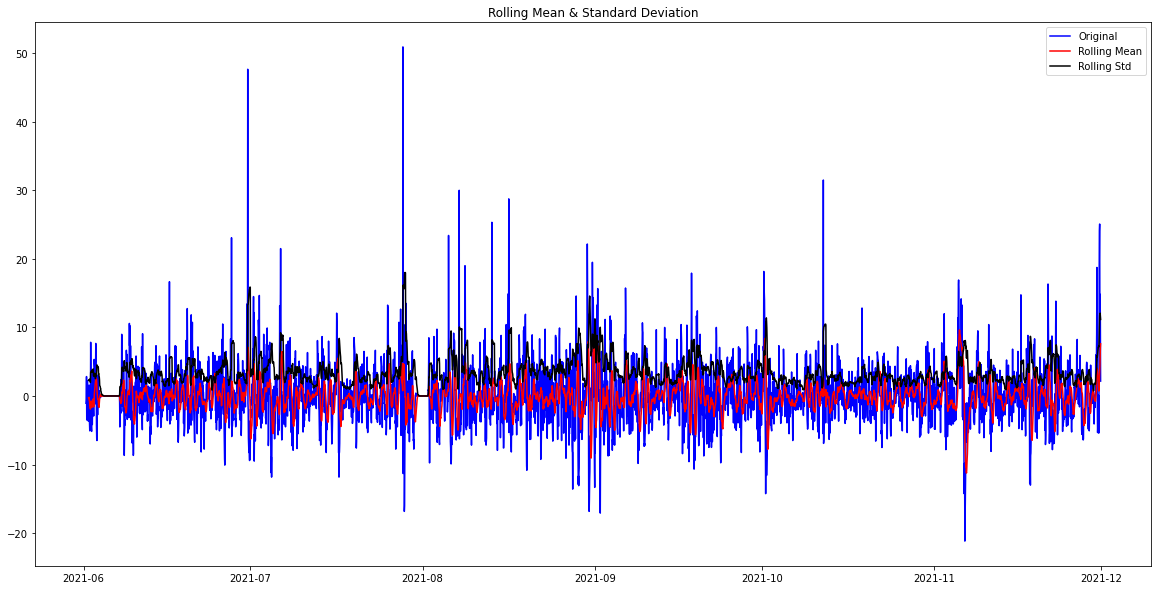

In [35]:
data_3 = data_2 - moving_avg
data_3.head(12)

data_3.dropna(inplace=True)

#Determing rolling statistics
rolmean = data_3.rolling(12).mean()
rolstd = data_3.rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(data_3, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

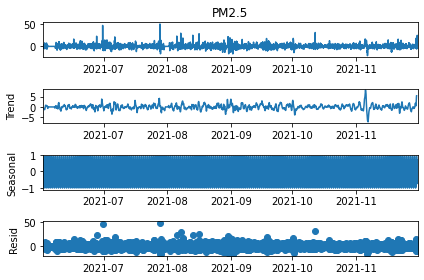

In [36]:
series = data_3
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [140]:
model = ARIMA(data_2, order=(3, 1, 0))  
model
results_ARIMA = model.fit(disp=0)  
# plt.figure(figsize=(20,10))
# plt.plot(data_3)
# plt.plot(results_ARIMA.fittedvalues, color='red')

NameError: name 'data_2' is not defined

## 利用 ARIMA模型決定是否差分

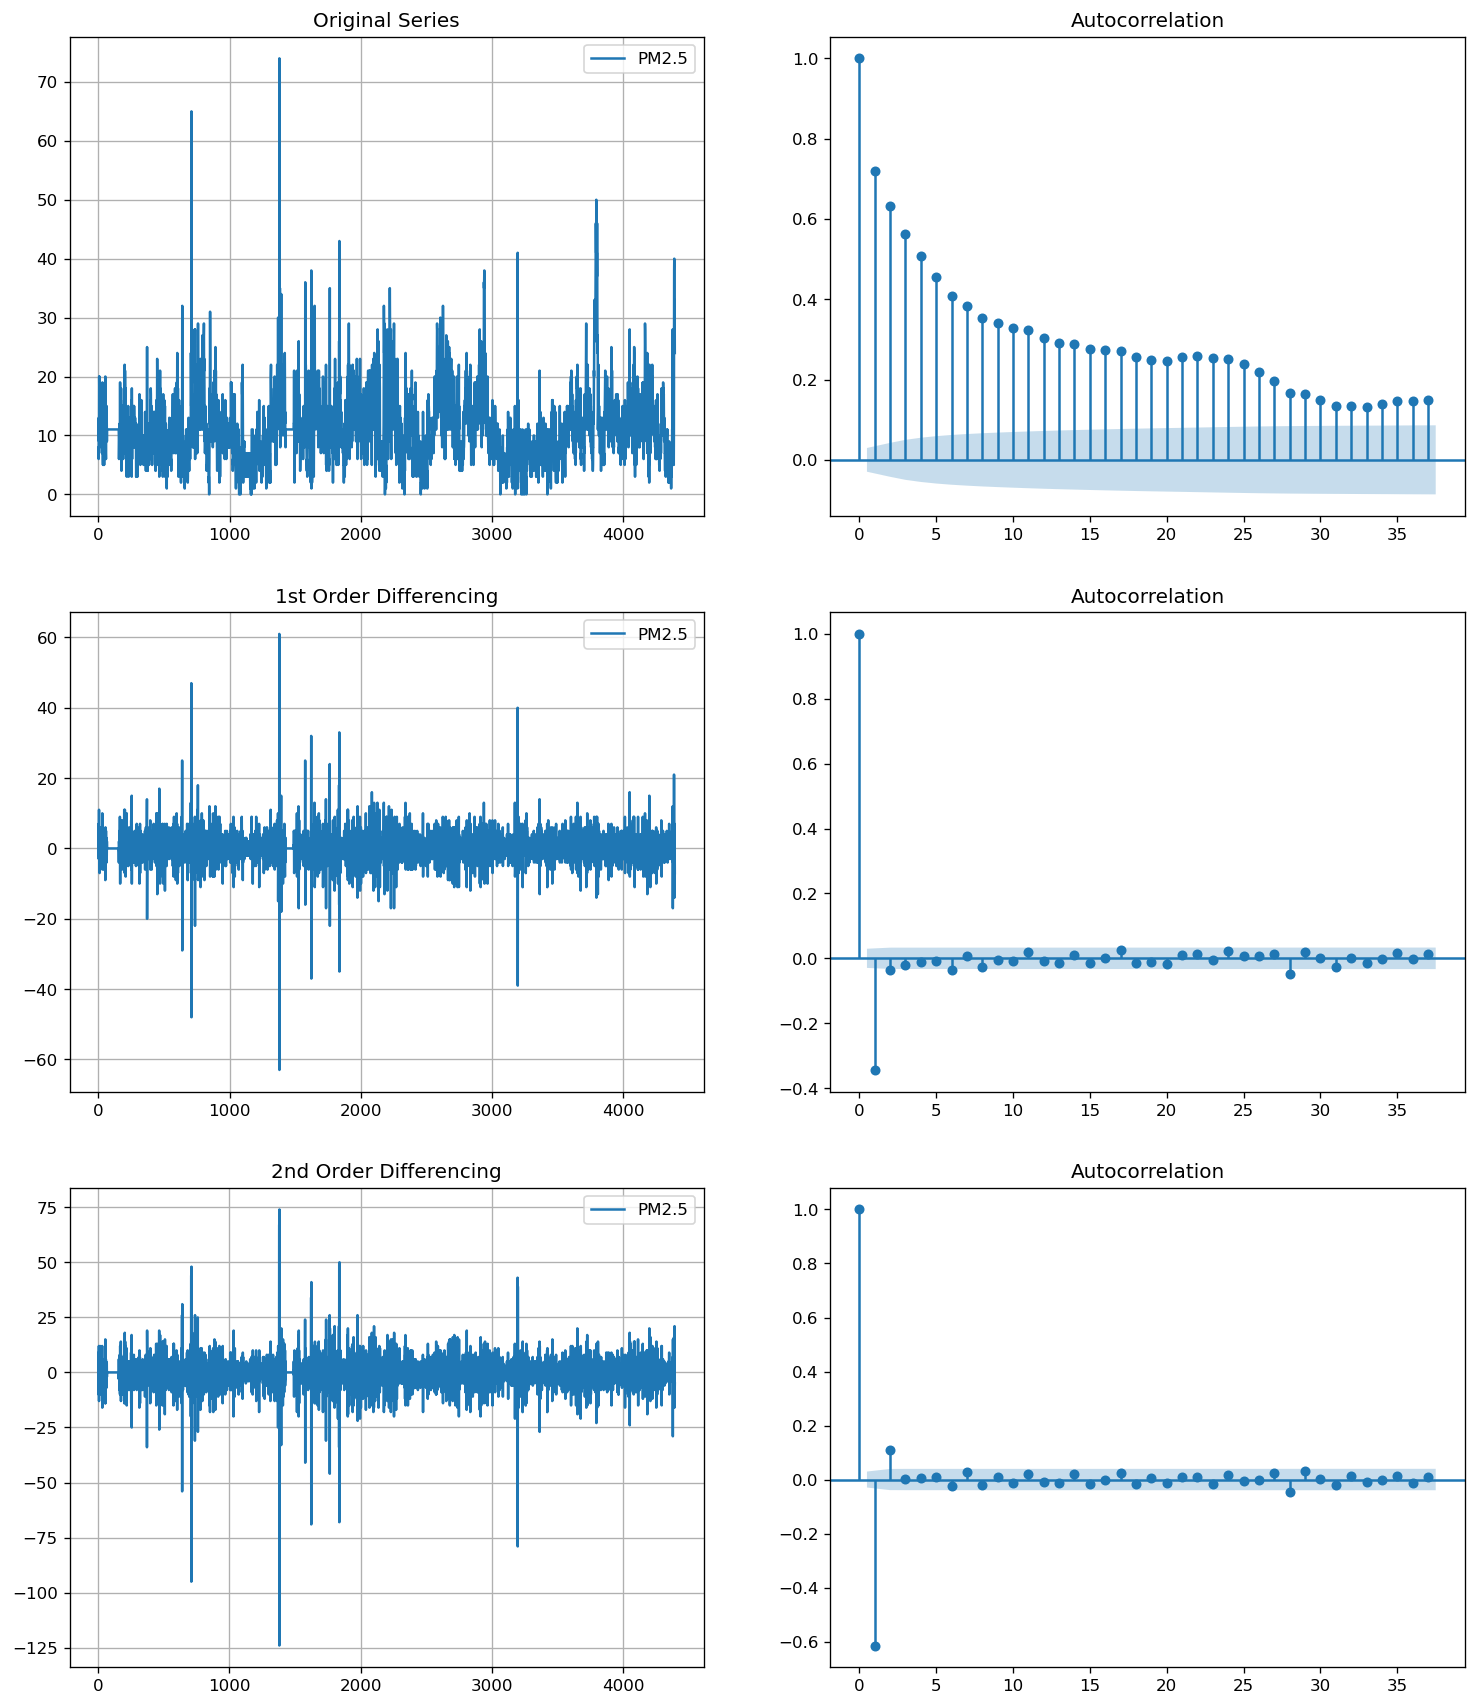

In [66]:
plt.rcParams.update({'figure.figsize':(15,18)})

###  Original Series
# sharex, sharey控制 x, y 軸之間的屬性共享，當 = True 或 all 表示 x 或 y 軸屬性將在所有子圖中共享
fig, axes = plt.subplots(3, 2, sharex=False)  
p1 = data[["PM2.5"]].plot(grid=True, ax = axes[0,0])
p1.set_title('Original Series')
p2 = plot_acf(data[["PM2.5"]], ax = axes[0,1])

# 1st Differencing
p3 = data[["PM2.5"]].diff().plot(grid=True, ax = axes[1,0])
p3.set_title('1st Order Differencing')
p4 = plot_acf(data[["PM2.5"]].diff().dropna(), ax = axes[1,1])

# 2nd Differencing
p5 = data[["PM2.5"]].diff().diff().plot(grid=True, ax = axes[2,0])
p5.set_title('2nd Order Differencing')
p6 = plot_acf(data[["PM2.5"]].diff().diff().dropna(), ax = axes[2,1])

plt.show()

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data[["PM2.5"]], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H wil

                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 4391
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12303.788
Method:                       css-mle   S.D. of innovations              3.987
Date:                Tue, 14 Dec 2021   AIC                          24617.576
Time:                        09:32:24   BIC                          24649.513
Sample:                    06-01-2021   HQIC                         24628.843
                         - 11-30-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.004      0.071      0.944      -0.008       0.009
ar.L1.D.PM2.5     0.8390      0.017     50.242      0.000       0.806       0.872
ma.L1.D.PM2.5    -1.3285      0.025    -

## 檢查殘差
>通常會檢查模型配適的殘差序列，即訓練資料原本的序列減去訓練資料上的擬合序列後的序列。該序列越符合隨機誤差分佈(均值為0的正態分佈)，說明模型擬合的越好，否則，說明還有一些因素模型未能考慮。

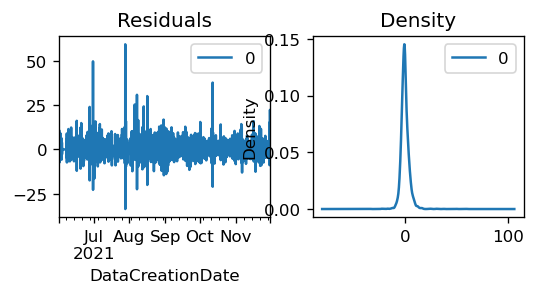

In [39]:
plt.rcParams.update({'figure.figsize':(5,2)})
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

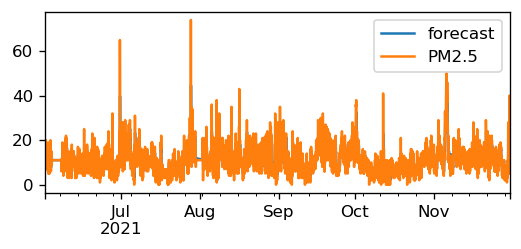

In [42]:
# Actual vs Fitted
plt.rcParams.update({'figure.figsize':(5,2)})
model_fit.plot_predict(dynamic=False)
plt.show()

## 模型預測
>除了在訓練資料上擬合，一般都會預留一部分時間段作為模型的驗證，這部分時間段的資料不參與模型的訓練

In [143]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.iloc[:4382, 1]
test = data.iloc[4382:, 1]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp = 0)  
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 4391
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12303.788
Method:                       css-mle   S.D. of innovations              3.987
Date:                Tue, 14 Dec 2021   AIC                          24617.576
Time:                        14:51:21   BIC                          24649.513
Sample:                    06-01-2021   HQIC                         24628.843
                         - 11-30-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.004      0.071      0.944      -0.008       0.009
ar.L1.D.PM2.5     0.8390      0.017     50.242      0.000       0.806       0.872
ma.L1.D.PM2.5    -1.3285      0.025    -

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [144]:
fitted.forecast(10, alpha=0.05)

(array([7.04353004, 7.20957196, 7.34798744, 7.46335411, 7.55949109,
        7.63958469, 7.70629326, 7.76183467, 7.80805929, 7.84651087]),
 array([3.95872113, 4.43002789, 4.74744147, 4.97035536, 5.13147842,
        5.25063458, 5.34053877, 5.40965262, 5.46375519, 5.50687123]),
 array([[-0.71542081, 14.80248088],
        [-1.47312315, 15.89226707],
        [-1.95682687, 16.65280175],
        [-2.2783634 , 17.20507161],
        [-2.49802181, 17.61700398],
        [-2.65146998, 17.93063937],
        [-2.76097038, 18.17355691],
        [-2.84088963, 18.36455898],
        [-2.90070411, 18.51682269],
        [-2.94675841, 18.63978015]]))

In [136]:
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [137]:
fc_series_pd = pd.DataFrame(fc_series)
fc_series_pd 

,0
4382,7.043530
4383,7.209572
4384,7.347987
4385,7.463354
4386,7.559491
4387,7.639585
4388,7.706293
4389,7.761835
4390,7.808059
4391,7.846511


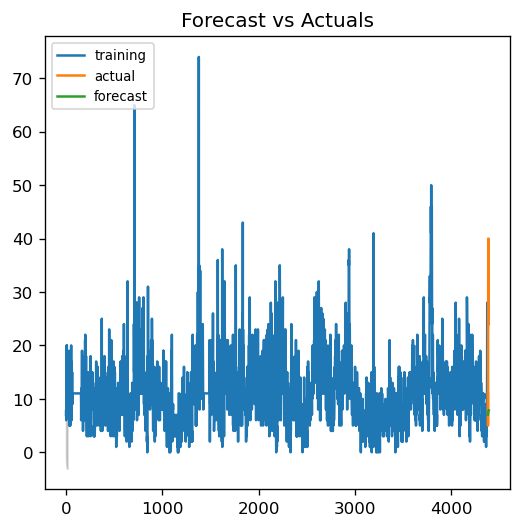

In [139]:
plt.rcParams.update({'figure.figsize':(10, 2)})
# Plot
plt.figure(figsize=(5,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_pd, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()